# Helpful Functions

In [1]:
def wh2xy(bbox):
    return [bbox[0], bbox[1], bbox[2] + bbox[0], bbox[3] + bbox[1]]


def xy2wh(bbox):
    return [bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]]


def int_wh2xy(bbox):
    return list(map(int, wh2xy(bbox)))


def int_xy2wh(bbox):
    return list(map(int, xy2wh(bbox)))

def extract_patch(image, bbox):
    x, y, w, h = bbox
    return image[y:y + h, x:x + w]

# Trajectory Loading and Visualization

<Figure size 2000x1000 with 0 Axes>

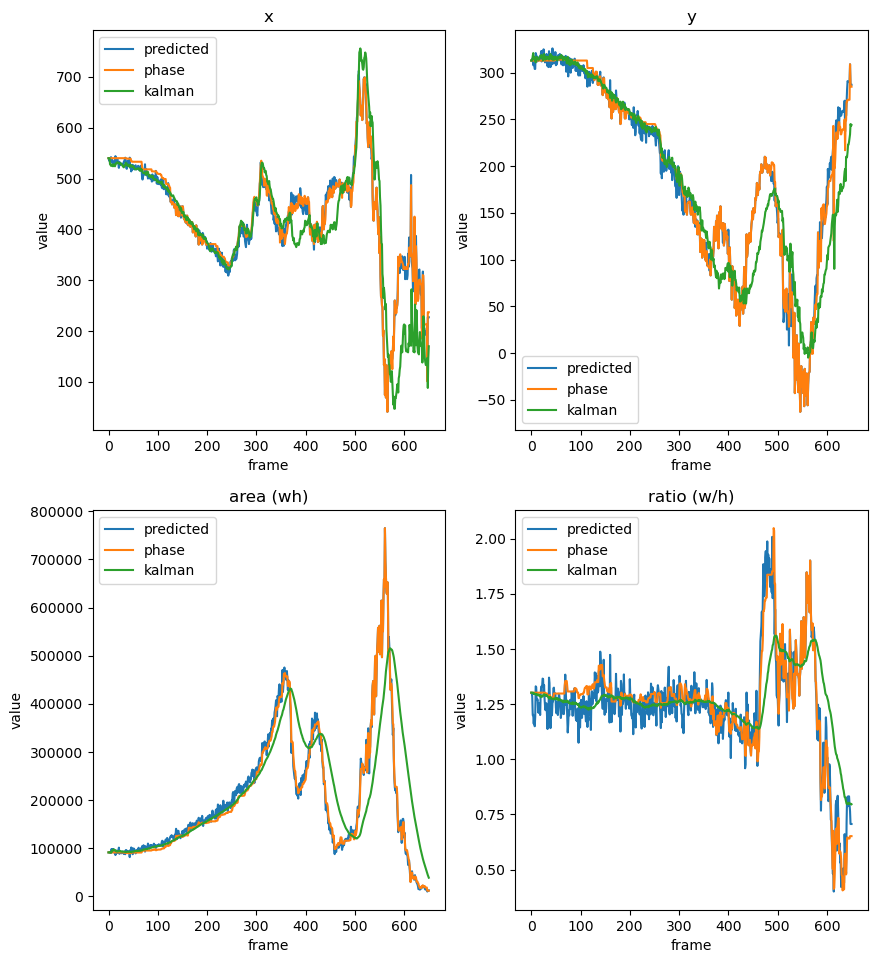

[104.19682519  97.66517998 180.69405073 115.04533036]
[130.87847817  95.63835459 144.31548867 101.81840156]


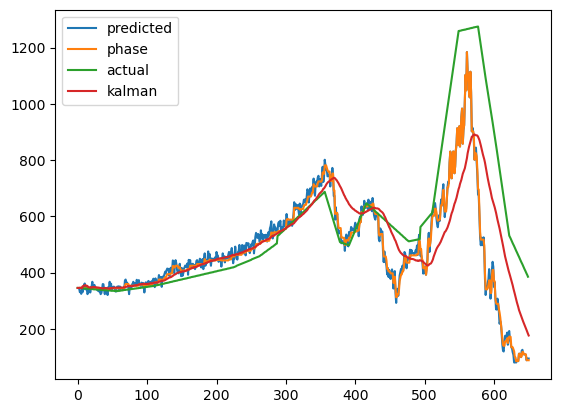

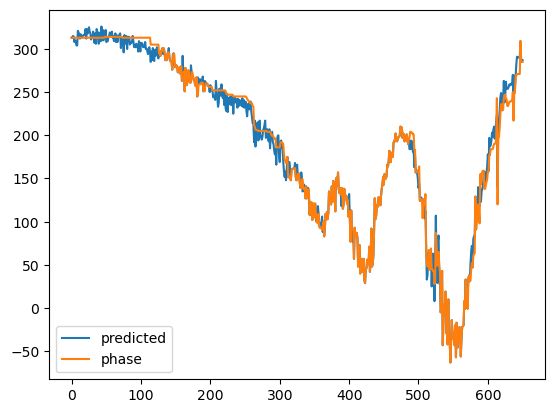

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
# from arch import arch_model
folder = "005"
df = pd.read_csv(f"data/bounding_boxes/{folder}.txt", header=None)
actual_boxes = df.astype(int).values
with open(f"artifacts/trained-atom-{folder}.json") as f:
    data = json.load(f)
for key in data:
    data[key] = np.array(data[key])
dim = 2

plt.figure(figsize=(20, 10))

names = []
# bboxes = [data['predicted'], data['phase'], data['kalman'], actual_boxes]
# names = ['predicted', 'phase', 'kalman', 'actual']

bboxes = [data['predicted'], data['phase'], data['kalman']]
names = ['predicted', 'phase', 'kalman']
# bboxes = [data['predicted'], data['kalman'], actual_boxes]
# names = ['predicted', 'kalman', 'actual']

# bboxes = [data['predicted'], actual_boxes]
# names = ['predicted', 'actual']
fig, axes = plt.subplots(2,2, figsize=(10, 10))
plt.subplots_adjust(bottom=0.0005)
titles = ['x', 'y', 'area (wh)', 'ratio (w/h)']
for i, (row, col) in enumerate(itertools.product(range(2), range(2))):
    axes[row][col].set_title(f"{titles[i]}")
    for bbox, name in zip(bboxes, names):
        if i == 2:
            d = bbox[:,2] * bbox[:,3]

        elif i == 3:
            d =  bbox[:,2] / bbox[:,3]
        else:
            d = bbox[:,i]
        
        axes[row][col].plot(d, label=name)
        
        # axes[row][col]
    axes[row][col].set_xlabel("frame")
    axes[row][col].set_ylabel("value")
    axes[row][col].legend()
    # axes[row][col].plot(, label="predicted")
# plt
# plt.ylabel("value")
plt.show()
#         ax1 = plt.subplot(1, 3, 1)
#         ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
#         ax3 = plt.subplot(1, 3, 3)
        
#         ax1.imshow(img, cmap='gray')
#         ax1.set_axis_off()
#         ax2.imshow(rect_prev_gray, cmap='gray')
#         ax2.set_axis_off()
#         ax3.imshow(new_rect_cur)
#         print(new_current_bbox, current_box)
#         ax3.set_axis_off()
#         plt.show()


print(data['predicted'].std(axis=0))
print(data['kalman'].std(axis=0))
plt.plot(data['predicted'][:,dim], label="predicted")
plt.plot(data['phase'][:,dim], label="phase")
plt.plot(actual_boxes[:,dim], label="actual")
plt.plot(data['kalman'][:,dim], label="kalman")
plt.legend()
plt.show()

dim = 1


plt.plot(data['predicted'][:,dim], label="predicted")
plt.plot(data['phase'][:,dim], label="phase")
# plt.plot(data['kalman'][:,dim], label="kalman")
plt.legend()
plt.show()

[0, 0]
[0, 1]
[1, 0]
[1, 1]


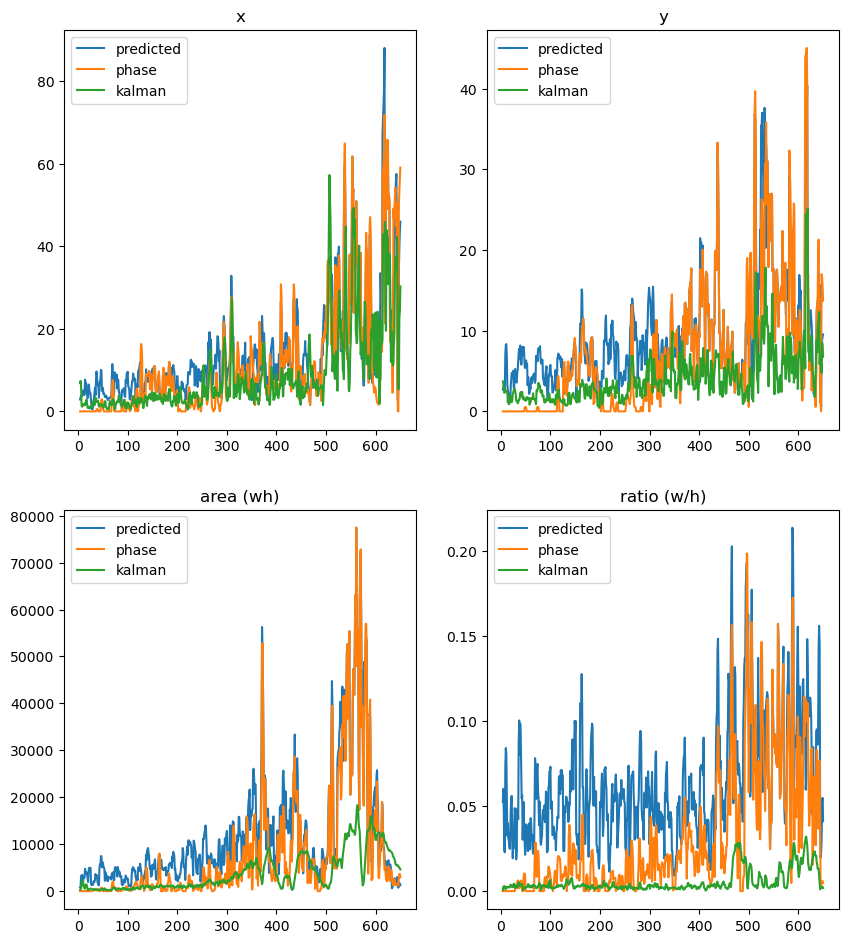

In [3]:
fig, axes = plt.subplots(2,2, figsize=(10, 10))
plt.subplots_adjust(bottom=0.0005)
lst = [[0 ,0], [0, 1], [1, 0], [1, 1]]
for k, i in enumerate([0, 1, "scale", "ratio"]):
    print(lst[k])
    for j, bbox in enumerate(bboxes):
        # print(bbox.shape)
        df = pd.DataFrame(bbox) #.rolling(5).std()
        df["scale"] = df[2]*df[3]
        df["ratio"] = df[2]/df[3]
        # m = arch_model(df[i], p=1,q=1, vol='GARCH')
        # m_fit = m.fit() #.plot()
        # m_fit.conditional_volatility
        df = df.rolling(5).std()
        axes[lst[k][0]][lst[k][1]].set_title(f"{titles[k]}")
        axes[lst[k][0]][lst[k][1]].plot(df[i], label=names[j])
        # plt.plot(df[i], label=names[j])
    axes[lst[k][0]][lst[k][1]].legend()
plt.show()

(1440, 2560, 3)


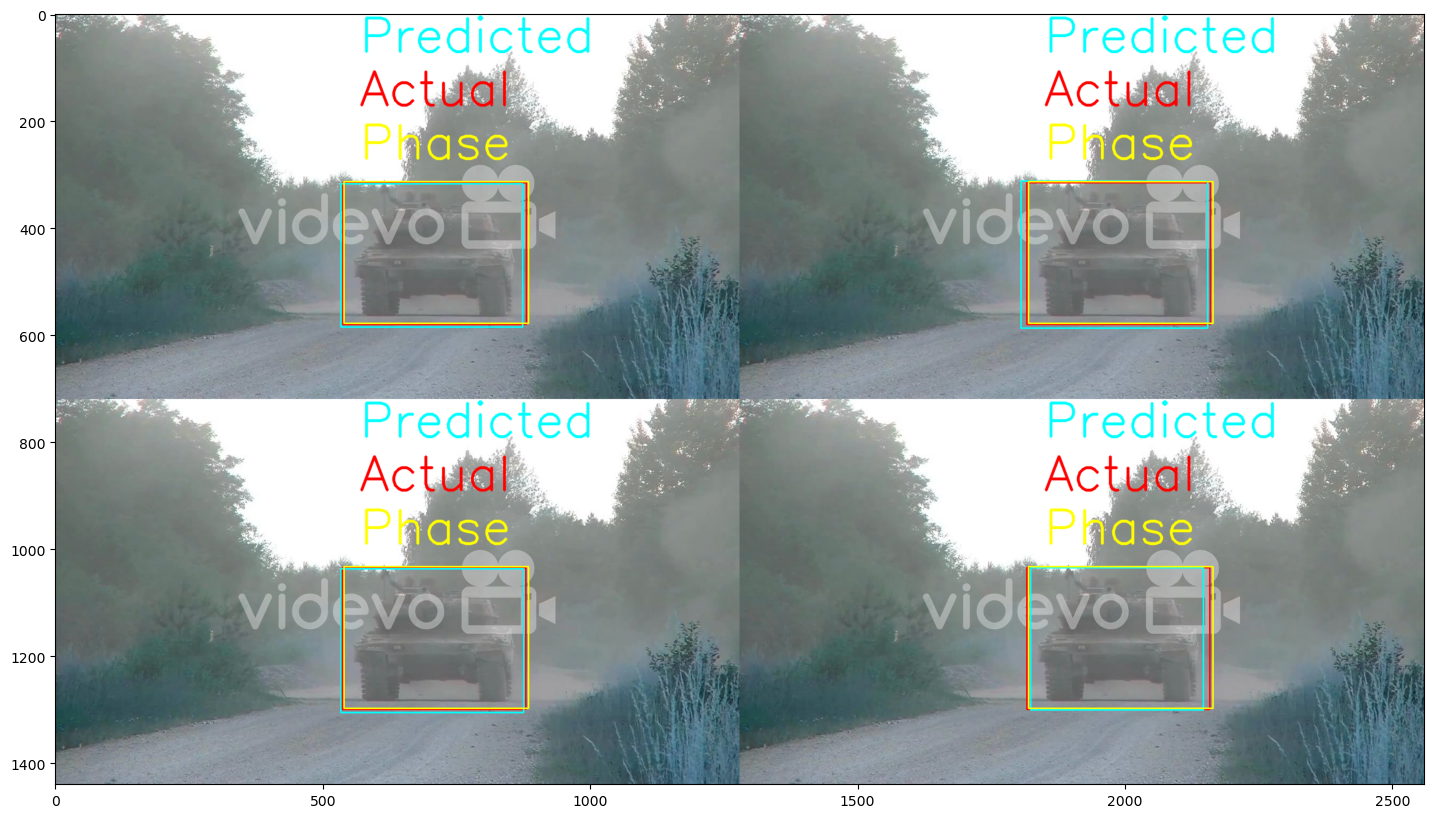

In [4]:
import cv2
from pathlib import Path
frame_1 = 14
# frame_2 = 13
init = True
l = [[0, 0], [0, 1], [1 ,0], [1, 1]]
for k, frame_1 in enumerate([11, 12, 13, 14]):
    path_to_data = Path(f"data/train/{folder}//")

    frames = []

    frame1 = cv2.imread(str(path_to_data / '{:08}.jpg'.format(frame_1 + 1)))
    # frame2 = cv2.imread(str(path_to_data / '{:08}.jpg'.format(frame_2 + 1)))
    if init:
        
        h, w = frame1.shape[:2]
        empty_im = np.zeros((h*2, w*2, 3), dtype=np.uint8)
        print(empty_im.shape)
        init=False
    actual_bbox = int_wh2xy(actual_boxes[frame_1])
    predicted_bbox = int_wh2xy(data['predicted'][frame_1])
    color = (255, 0, 0) 

    # print(actual_bbox)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame1, "Actual", (570, 170), font, 3, color, 3, cv2.LINE_AA)
    cv2.rectangle(frame1, (int(actual_bbox[0]), int(actual_bbox[1])), (int(actual_bbox[2]), int(actual_bbox[3])), color, 2, 2)

    cv2.putText(frame1, "Predicted", (570, 70), font, 3, (0, 255, 255), 3, cv2.LINE_AA)
    cv2.rectangle(frame1, tuple(predicted_bbox[:2]), tuple(predicted_bbox[2:]), (0, 255, 255), 2, 2)

    kalman_bbox = int_wh2xy(data['phase'][frame_1])
    cv2.putText(frame1, "Phase", (570, 270), font, 3, (255, 255, 0), 3, cv2.LINE_AA)

    cv2.rectangle(frame1, tuple(kalman_bbox[:2]), tuple(kalman_bbox[2:]), (255, 255, 0), 2, 2)
    # fra
    f, m = l[k]
    # print(f*h, (f + 1)*h,l*w, (l + 1)*w , frame1.shape)
    empty_im[f*h: (f + 1)*h,m*w: (m + 1)*w ] = frame1
    # 
plt.rcParams["figure.figsize"] = (20, 10)
plt.imshow(empty_im)
# write_im(empty_im)
plt.show()

# Phase Correlation

(269, 342) (266, 323) [269 342   3]
(269, 342) (269, 342)
(269, 342) (269, 342)


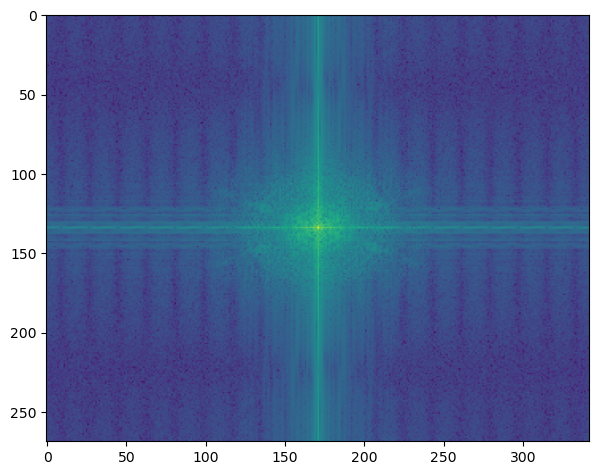

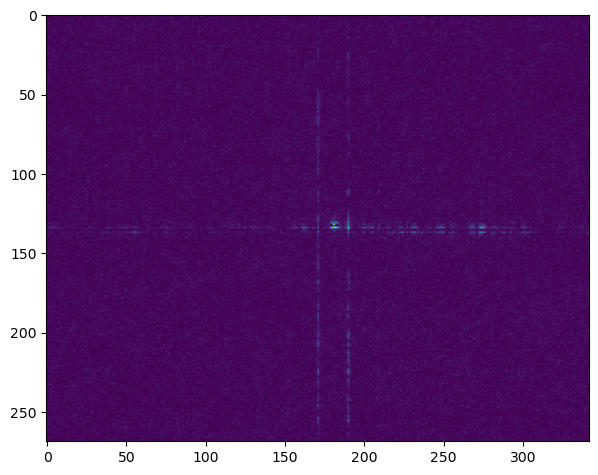

Custom Phase Shift:  (-2, 10)  Sklearn Shift:  [-2. 10.]


In [5]:
import cv2
from pathlib import Path
path_to_data = Path(f"data/train/{folder}//")
def extract_patch(image, bbox):
    x, y, w, h = bbox
    return image[y:y + h, x:x + w]

frame_1 = 13
frame_2 = 14

frame1 = cv2.imread(str(path_to_data / '{:08}.jpg'.format(frame_1 + 1)))
frame2 = cv2.imread(str(path_to_data / '{:08}.jpg'.format(frame_2 + 1)))
rect_prev = extract_patch(frame1, data['predicted'][frame_1])
rect_cur = extract_patch(frame2, data['predicted'][frame_2])


mx_sh = np.max([rect_prev.shape, rect_cur.shape], 0)
# mx_sh_f = np.max([rect_prev_f.shape, rect_curr_f.shape], 0)

# padding to one size

rect_prev_gray = cv2.cvtColor(rect_prev, cv2.COLOR_BGR2GRAY)
rect_cur_gray = cv2.cvtColor(rect_cur, cv2.COLOR_BGR2GRAY)
print(rect_prev_gray.shape, rect_cur_gray.shape, mx_sh)
ksize = tuple([9]*2)
rect_prev_gray = cv2.GaussianBlur(rect_prev_gray, ksize, 0)
rect_cur_gray = cv2.GaussianBlur(rect_cur_gray, ksize, 0)
rect_prev_gray = np.pad(rect_prev_gray, [(0, mx_sh[0] - rect_prev_gray.shape[0]), (0, mx_sh[1] - rect_prev_gray.shape[1])],
                   'constant')

rect_cur_gray = np.pad(rect_cur_gray, [(0, mx_sh[0] - rect_cur_gray.shape[0]), (0, mx_sh[1] - rect_cur_gray.shape[1])],
                   'constant')
print(rect_prev_gray.shape, rect_cur_gray.shape)

# concated_frames = np.hstack([rect_cur_gray, np.full((rect_cur.shape[0], 10), fill_value=255, dtype=np.uint8), rect_prev_gray ])

print(rect_prev_gray.shape, rect_cur_gray.shape)
plt.rcParams["figure.figsize"] = (7, 7)

def cros_pow_spect(img1, img2, visualize=False):
    f = np.fft.fft2(img1)
    fshift1 = np.fft.fftshift(f)
    f = np.fft.fft2(img2)
    fshift2 = np.fft.fftshift(f)
    cross_power_spectrum = np.conj(fshift2) * fshift1

    f_ishift = cross_power_spectrum / np.abs(cross_power_spectrum)
    cps = np.fft.fftshift(np.fft.ifft2(f_ishift))
    if visualize:
        plt.imshow(np.log(np.abs(cross_power_spectrum)))
        plt.show()
        plt.imshow(np.abs(cps))  # .real)
        plt.show()
    center = cps.shape[0] // 2, cps.shape[1] // 2
    shift = np.unravel_index(np.argmax(cps), cps.shape)
    return shift[0] - center[0], shift[1] - center[1]

shift = cros_pow_spect(rect_prev_gray, rect_cur_gray, visualize=True)

from skimage.registration import phase_cross_correlation
sklearn_shift, err0, phdiff = phase_cross_correlation(rect_prev_gray, rect_cur_gray)
print("Custom Phase Shift: ", shift, " Sklearn Shift: ", sklearn_shift)
